In [1]:
import tensorflow as tf

In [20]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=x_train[0].shape))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)



Epoch 1/3
60000/60000 [==============================] - 5s 82us/step - loss: 0.2703 - acc: 0.9201
Epoch 2/3
60000/60000 [==============================] - 5s 78us/step - loss: 0.1075 - acc: 0.9661
Epoch 3/3
60000/60000 [==============================] - 5s 78us/step - loss: 0.0723 - acc: 0.9773


In [8]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

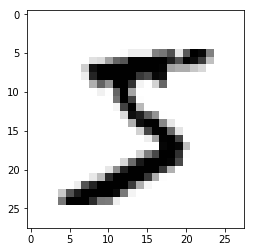

In [6]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()


In [21]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

10000/10000 [==============================] - 0s 34us/step
0.08967130576986819
0.9733


In [22]:
predictions = model.predict(x_test)

In [23]:
print(predictions)

[[2.03212863e-10 8.44097627e-08 9.99779218e-07 ... 9.99940515e-01
  1.22766473e-08 2.93773237e-08]
 [4.10798094e-07 9.93575202e-04 9.98942912e-01 ... 3.32491562e-10
  6.58092006e-07 1.11207911e-10]
 [1.71774707e-06 9.95198429e-01 3.89276742e-04 ... 7.78424292e-05
  2.55220034e-03 4.12277586e-06]
 ...
 [1.36452014e-08 6.25409655e-07 1.31849580e-08 ... 4.05673018e-05
  1.18838536e-04 1.31424385e-04]
 [1.52797426e-07 4.56010270e-08 4.66077843e-08 ... 1.73081744e-07
  3.40824539e-04 1.44165959e-08]
 [4.16113608e-07 1.00242588e-08 1.72574914e-07 ... 2.02928351e-11
  2.32882513e-07 2.62175637e-09]]


In [24]:
import numpy as np

print(np.argmax(predictions[6]))

4


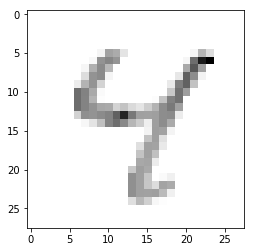

In [25]:
plt.imshow(x_test[6], cmap=plt.cm.binary)
plt.show()

In [26]:
model.save('epic_num_reader.model')

In [27]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [28]:
predictionsnew = new_model.predict(x_test)
print(predictionsnew)

[[2.03212863e-10 8.44097627e-08 9.99779218e-07 ... 9.99940515e-01
  1.22766473e-08 2.93773237e-08]
 [4.10798094e-07 9.93575202e-04 9.98942912e-01 ... 3.32491562e-10
  6.58092006e-07 1.11207911e-10]
 [1.71774707e-06 9.95198429e-01 3.89276742e-04 ... 7.78424292e-05
  2.55220034e-03 4.12277586e-06]
 ...
 [1.36452014e-08 6.25409655e-07 1.31849580e-08 ... 4.05673018e-05
  1.18838536e-04 1.31424385e-04]
 [1.52797426e-07 4.56010270e-08 4.66077843e-08 ... 1.73081744e-07
  3.40824539e-04 1.44165959e-08]
 [4.16113608e-07 1.00242588e-08 1.72574914e-07 ... 2.02928351e-11
  2.32882513e-07 2.62175637e-09]]


In [29]:
print(np.argmax(predictionsnew[59]))

5


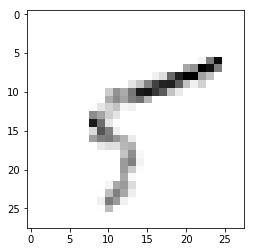

In [30]:
plt.imshow(x_test[59], cmap=plt.cm.binary)
plt.show()